<a href="https://colab.research.google.com/github/alex-jk/SWB-GVCEH/blob/main/models/relevance_model/Reddit_Relevancy_Model_Top2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Reddit Relevancy Model - Topic Modeling - Top2Vec

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install top2vec
!pip install top2vec[sentence_encoders]

In [3]:
import pandas as pd
import json
from top2vec import Top2Vec
import numpy as np
import re

import matplotlib.pyplot as plt
import umap

##### Import the full Reddit dataset
- remove duplicates to make sure that posts are unqiue
- TitleText is the text column of interest

In [4]:
file_path = '/content/drive/My Drive/SWB-GVCEH/Complete_Data_v3.json'
reddit_data_df = pd.read_json(file_path)

print(f"\ncd_test shape: {reddit_data_df.shape}")
print(f"\n--------------- Columns: {reddit_data_df.columns}")

select_cols = ['Subreddit', 'Title', 'Text', 'TitleText']
reddit_data_df = reddit_data_df[select_cols]
reddit_data_df.drop_duplicates(inplace=True)
reddit_data_df.reset_index(drop=True, inplace=True)

print("\n------------------------------")
print(reddit_data_df.head())


cd_test shape: (11160, 23)

--------------- Columns: Index(['index', 'Subreddit', 'Title', 'Text', 'TitleText', 'relevance_score',
       'most_common_centroid_id', 'top_terms_from_centroid',
       'topics_from_centroid', 'Score_model2', 'label_model2', 'label_model1',
       'relevant_sentences', 'topic_num', 'Relevant_document',
       'Relevant_topic', 'topic_label', 'Sentiment_Full',
       'Sentence_Level_Sentiment_Compund',
       'Relevent_Sentence_Sentiment_Compund', 'BERT_sentiment_all',
       'BERT_sentiments_relevant_sentences', 'manual_label'],
      dtype='object')

------------------------------
    Subreddit                                              Title  \
0  VictoriaBC  True change around homelessness from the homel...   
1  VictoriaBC  New transitional housing facility on Douglas o...   
2  VictoriaBC   Where to buy a reasonably priced Christmas tree?   
3  VictoriaBC  Looking for a Christmas tree? Please consider ...   
4  VictoriaBC                           

In [5]:
reddit_data_df['TitleText_fmtd'] = reddit_data_df['TitleText'].apply(lambda x: re.sub(r'\n', ' ', x))

docs = reddit_data_df['TitleText_fmtd'].to_list()
docs = [re.sub(r'[^a-zA-Z0-9\s]+', '',d).replace(" .",".") for d in docs]
docs = [re.sub(r'http\S+', '', d) for d in docs]

docs[100]

'What do the wealthy in VictoriaBC do Wealthy neighbourhoods like uplands north saanich 10 mile point etc I see amazing homes and but they are also very secluded from the rest of the general public in Victoria you would need a boat to even see the houses properly   What do they do which is extremely profitable in victoria BC Where do they hang out What community  events can they be seen'

In [6]:
print(Top2Vec.__doc__)


    Top2Vec

    Creates jointly embedded topic, document and word vectors.


    Parameters
    ----------
    documents: List of str
        Input corpus, should be a list of strings.

    min_count: int (Optional, default 50)
        Ignores all words with total frequency lower than this. For smaller
        corpora a smaller min_count will be necessary.

    topic_merge_delta: float (default 0.1)
        Merges topic vectors which have a cosine distance smaller than
        topic_merge_delta using dbscan. The epsilon parameter of dbscan is
        set to the topic_merge_delta.

    ngram_vocab: bool (Optional, default False)
        Add phrases to topic descriptions.

        Uses gensim phrases to find common phrases in the corpus and adds them
        to the vocabulary.

        For more information visit:
        https://radimrehurek.com/gensim/models/phrases.html

    ngram_vocab_args: dict (Optional, default None)
        Pass custom arguments to gensim phrases.

        For 

#### TRAIN MODEL

In [7]:
#model_min_20_ngram_large = Top2Vec(docs,min_count=20, ngram_vocab=True,embedding_model='universal-sentence-encoder-large')
model_min_20_ngram = Top2Vec(docs,min_count=20, ngram_vocab=True,embedding_model='universal-sentence-encoder')

2024-04-05 17:59:48,589 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-04-05 18:00:05,391 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2024-04-05 18:00:38,276 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-05 18:00:49,836 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-05 18:01:55,107 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-04-05 18:01:55,930 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [8]:
len(model_min_20_ngram.vocab)

6293

In [9]:
bigrams_large = []
for word in model_min_20_ngram.vocab:
    if len(word.split()) == 2:
        bigrams_large.append(word)
bigrams_large

['my own',
 'those who',
 'their lives',
 'you can',
 'your own',
 'experiences with',
 'going through',
 'know what',
 'housing facility',
 'christmas tree',
 'this year',
 'any other',
 'worth checking',
 'facebook marketplace',
 'looking for',
 'please consider',
 'long story',
 'moved here',
 'next steps',
 'lots of',
 'lack of',
 'really hard',
 'someone who',
 'has been',
 'next step',
 'going forward',
 'as well',
 'it comes',
 'people who',
 'right now',
 'dont care',
 'homeless population',
 'pretty much',
 'more than',
 'can afford',
 'harm reduction',
 'rather than',
 'easily accessible',
 'mentally ill',
 'go through',
 'first step',
 'either way',
 'let alone',
 'ive worked',
 'number of',
 'homeless people',
 'because they',
 'few months',
 'will be',
 'of course',
 'could be',
 'trying to',
 'good luck',
 'did search',
 'brand new',
 'in advance',
 'bunch of',
 'am looking',
 'an organization',
 'been able',
 'would be',
 'something like',
 'focused on',
 'mens clothing'

In [10]:
doc_vecs = model_min_20_ngram.document_vectors

docs_reduced = umap.UMAP(n_components=2,
                         n_neighbors=15,
                         metric="cosine",
                         min_dist=.10,
                         random_state=42,
                         verbose=True).fit_transform(doc_vecs)

x, y = docs_reduced[:,0], docs_reduced[:,1]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


UMAP(angular_rp_forest=True, metric='cosine', n_jobs=1, random_state=42, verbose=True)
Fri Apr  5 18:04:28 2024 Construct fuzzy simplicial set
Fri Apr  5 18:04:28 2024 Finding Nearest Neighbors
Fri Apr  5 18:04:28 2024 Building RP forest with 10 trees
Fri Apr  5 18:04:28 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
Fri Apr  5 18:04:30 2024 Finished Nearest Neighbor Search
Fri Apr  5 18:04:30 2024 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Fri Apr  5 18:04:41 2024 Finished embedding


In [11]:
z = pd.DataFrame(model_min_20_ngram.get_documents_topics(model_min_20_ngram.document_ids)).T.reset_index()[0]

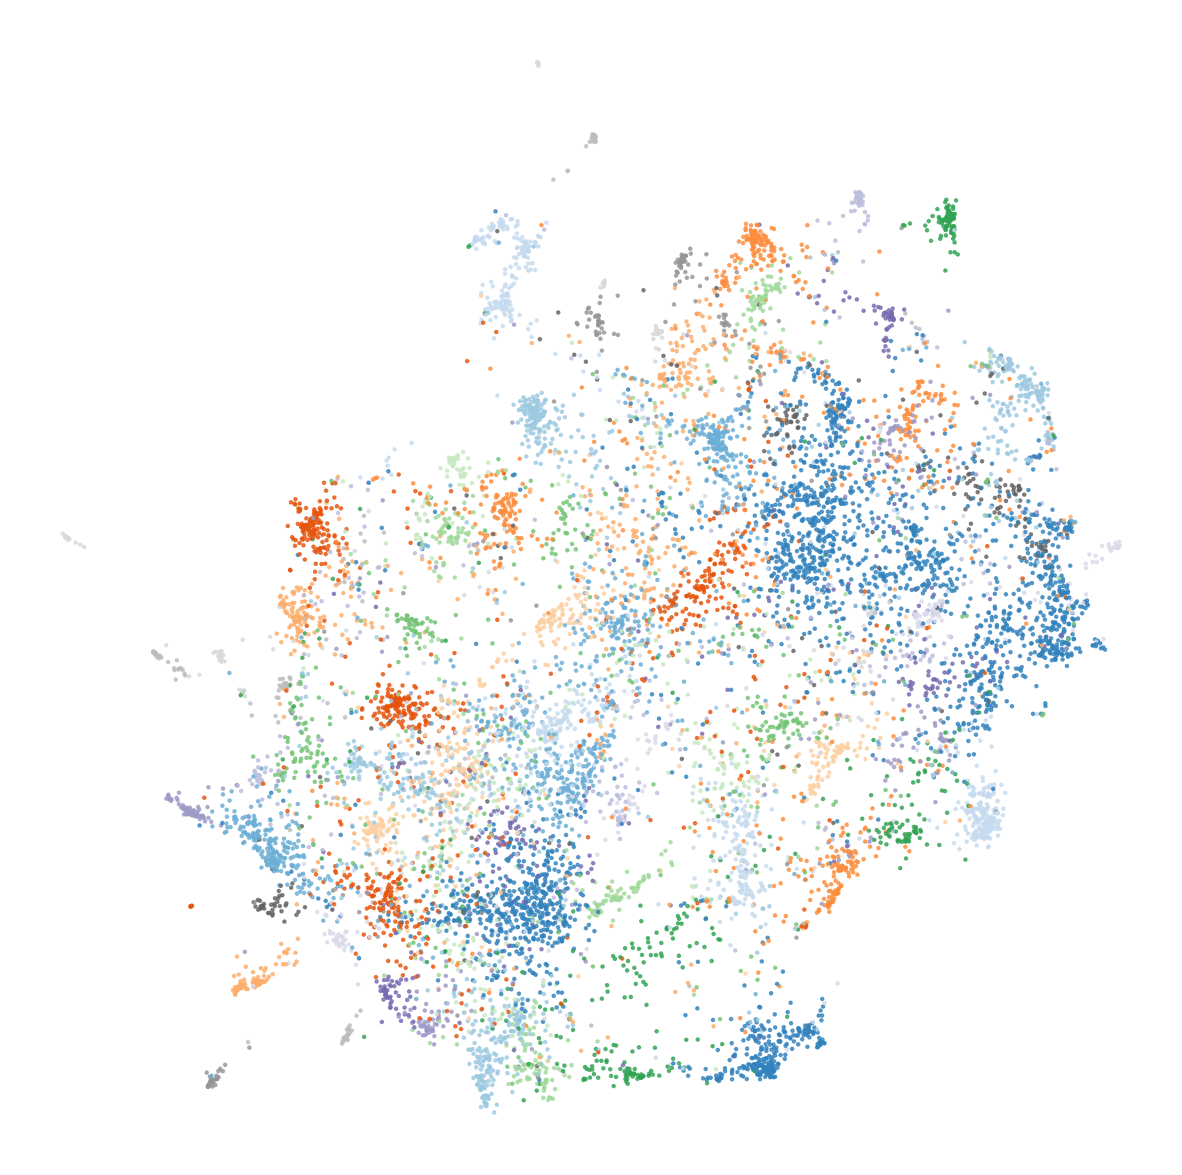

In [12]:
plt.figure(figsize=(15,15))
plt.scatter(x, y, s=5, alpha=.75,c=z,cmap='tab20c')
plt.axis("off")
plt.show()

In [13]:
topic_sizes, topic_nums = model_min_20_ngram.get_topic_sizes()
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [14]:
documents, document_scores, document_ids = model_min_20_ngram.search_documents_by_keywords(keywords=["homelessness"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 2928, Score: 0.6870273341754397
-----------
Homeless Count Results 
-----------

Document: 2897, Score: 0.5885235307842915
-----------
Showers for the Homeless 
-----------

Document: 2962, Score: 0.5595093591252589
-----------
Street Survival Guide  made by and for those experiencing homelessness 
-----------

Document: 0, Score: 0.5184819038583567
-----------
True change around homelessness from the homeless leaders with REAL lived experience Ive started my own organization to expose the corruption around homelessness in Victoria BC Also to educate others of whats truly contributing to poverty and homelessness what the failures of the system are and what are the solutions from those who are homeless or overcame homelessness and have the unique experience to really create real change and effect Giving a new purpose and motivation for those who have experienced poverty all their lives For us to find a way to have a purpose in our struggle Real Lived Experience which brings tr

In [18]:
df_results = pd.DataFrame(model_min_20_ngram.get_documents_topics(model_min_20_ngram.document_ids)).T
df_results = pd.DataFrame(model_min_20_ngram.get_documents_topics(model_min_20_ngram.document_ids)).T.reset_index()
df_results = pd.merge(reddit_data_df.reset_index(),df_results,how='left',left_index=True,right_index=True)
df_results.set_index('index_x',inplace=True)
final_output = pd.merge(reddit_data_df,df_results[['Title',0,1,2,3]],how='left',left_index=True,right_index=True).rename(columns={0:'cluster',1:'scores',2:'Topic Words',3:'embedding'})
final_output

,Subreddit,Title_x,Text,TitleText,TitleText_fmtd,Title_y,cluster,scores,Topic Words,embedding
0,VictoriaBC,True change around homelessness from the homel...,I've started my own organization to expose the...,True change around homelessness from the homel...,True change around homelessness from the homel...,True change around homelessness from the homel...,28,0.713879,"[homeless encampment, homelessness, homeless s...","[0.52086556, 0.5067103, 0.49961302, 0.49159372..."
1,VictoriaBC,New transitional housing facility on Douglas o...,None,New transitional housing facility on Douglas o...,New transitional housing facility on Douglas o...,New transitional housing facility on Douglas o...,15,0.50099,"[affordable housing, housing affordability, ho...","[0.6063309, 0.59182644, 0.5452634, 0.49284774,..."
2,VictoriaBC,Where to buy a reasonably priced Christmas tree?,Went to the Christmas tree farm today and thou...,Where to buy a reasonably priced Christmas tre...,Where to buy a reasonably priced Christmas tre...,Where to buy a reasonably priced Christmas tree?,57,0.691607,"[trees, tree, christmas tree, cherry blossom, ...","[0.38264936, 0.36895502, 0.3508559, 0.30767033..."
3,VictoriaBC,Looking for a Christmas tree? Please consider ...,None,Looking for a Christmas tree? Please consider ...,Looking for a Christmas tree? Please consider ...,Looking for a Christmas tree? Please consider ...,57,0.523432,"[trees, tree, christmas tree, cherry blossom, ...","[0.38264936, 0.36895502, 0.3508559, 0.30767033..."
4,VictoriaBC,Free clothing places?,Hey so long story short I moved here from Sask...,Free clothing places?. Hey so long story short...,Free clothing places?. Hey so long story short...,Free clothing places?,12,0.534553,"[salvation army, curbside recycling, thrift st...","[0.43211865, 0.4134178, 0.41261208, 0.40495992..."
...,...,...,...,...,...,...,...,...,...,...
11146,britishcolumbia,Mountain life out in the Boonies of Chilliwack...,None,Mountain life out in the Boonies of Chilliwack...,Mountain life out in the Boonies of Chilliwack...,Mountain life out in the Boonies of Chilliwack...,26,0.295073,"[sunset, early morning, sunday morning, sunshi...","[0.58000547, 0.493431, 0.4634711, 0.4353282, 0..."
11147,britishcolumbia,B.C. couple tracks down photographer of mounta...,None,B.C. couple tracks down photographer of mounta...,B.C. couple tracks down photographer of mounta...,B.C. couple tracks down photographer of mounta...,19,0.480767,"[bc govt, bc gov, bc hydro, bc legislature, bc...","[0.64621854, 0.6360756, 0.60077596, 0.59815204..."
11148,britishcolumbia,Where to donate clothing besides VV in the Fra...,Hi there\nI have a good amount of good quality...,Where to donate clothing besides VV in the Fra...,Where to donate clothing besides VV in the Fra...,Where to donate clothing besides VV in the Fra...,12,0.705969,"[salvation army, curbside recycling, thrift st...","[0.43211865, 0.4134178, 0.41261208, 0.40495992..."
11149,britishcolumbia,Two killed in grizzly attack at Banff National...,None,Two killed in grizzly attack at Banff National...,Two killed in grizzly attack at Banff National...,Two killed in grizzly attack at Banff National...,37,0.395863,"[whale watching, salish sea, sea lions, salmon...","[0.4193854, 0.4143732, 0.3958828, 0.33443272, ..."


In [19]:
final_output.to_json(r'202404_final_output_new.json')

#### SAVE MODEL